In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries
import pandas as pd
import numpy as np
#library visualisasi
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
# Library untuk mencari parameter terbaik
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/IPM.csv')
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [ ]:
# Mengecek missing value
data.isna().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
# cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


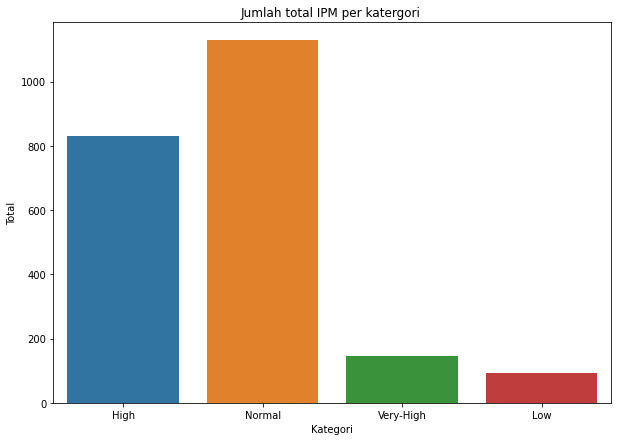

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data['IPM'])
plt.xlabel("Kategori")
plt.ylabel("Total")
plt.title('Jumlah total IPM per katergori ')
plt.show()

# sns.countplot(data['IPM'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


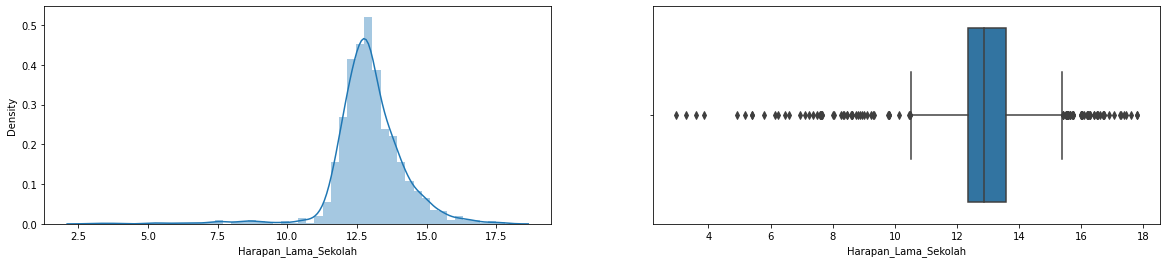

In [ ]:
#Univariate analysis age.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(data['Harapan_Lama_Sekolah'])

f.add_subplot(1,2,2)
sns.boxplot(data['Harapan_Lama_Sekolah'])

# Preprocessing

In [ ]:
new_ipm = preprocessing.LabelEncoder()
data['IPM'] = new_ipm.fit_transform(data['IPM'])
data.head(5)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,0
1,13.90,7148,9.48,65.28,2
2,14.32,8776,8.68,67.43,2
3,14.60,8180,8.88,64.40,2
4,14.01,8030,9.67,68.22,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.9 KB


In [ ]:
fitur_x = ['Harapan_Lama_Sekolah','Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah','Usia_Harapan_Hidup']
x = data[fitur_x].values
y = data['IPM'].values


# MODEL 40%

In [ ]:
# Split test 40%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 50)

In [ ]:
# Membuat numerical data pada dataset memiliki rentang nilai yang sama
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
X_train

array([[-0.24029517, -0.18601004, -0.87221558,  0.57163589],
       [ 1.00646774, -0.00626661,  0.24944779,  1.67776271],
       [-0.15070742, -0.52891678, -1.52651921, -0.85468553],
       ...,
       [-0.38214245,  0.1512444 , -0.67280876, -1.51836162],
       [ 0.92434563,  1.48481251,  1.86962821,  0.68807029],
       [ 0.70784189, -0.3024476 ,  0.26814218,  0.69680287]])

In [ ]:
X_test

array([[-0.70316524, -0.54323597, -1.21494605, -0.69749909],
       [ 0.40921605,  0.31365408,  0.94737166, -0.07166418],
       [-0.665837  ,  0.34493019, -0.23660634,  0.00401818],
       ...,
       [-0.68823394, -0.7542555 , -0.80366948,  0.13791774],
       [-3.30867575, -1.66163951, -2.19328577, -3.6549329 ],
       [ 0.15538408, -0.87634538,  0.467549  , -1.53873764]])

In [ ]:
# Model KNN
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 95.33560864618885 %


In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[312   0  10   6]
 [  0  30   4   0]
 [ 16   1 440   0]
 [  4   0   0  56]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       328
           1       0.97      0.88      0.92        34
           2       0.97      0.96      0.97       457
           3       0.90      0.93      0.92        60

    accuracy                           0.95       879
   macro avg       0.94      0.93      0.94       879
weighted avg       0.95      0.95      0.95       879



In [ ]:
# Evaluasi
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 95.33560864618885 %


# Model 30%

In [ ]:
# Split test 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 50)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Evaluasi
y_pred=classifier.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 96.20637329286798 %


# MODEL 20%

In [ ]:
# Split test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Evaluasi
y_pred=classifier.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 96.81818181818181 %


# Model 10%

In [ ]:
# Split test 10%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 50)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Evaluasi
y_pred=classifier.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 97.27272727272728 %


## GridSearch 40%

In [ ]:
# Split test 40%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 50)

In [ ]:
grid_params = {'n_neighbors' : range(1,30),
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : range(1,50)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)
best_params = g_res.best_params_

Fitting 3 folds for each of 8526 candidates, totalling 25578 fits


In [ ]:
print(f"Parameter Terbaik : {best_params}")

klasifikasi = KNeighborsClassifier(**best_params)
klasifikasi.fit(X_train, y_train)

Parameter Terbaik : {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 27, 'weights': 'distance'}


KNeighborsClassifier(leaf_size=1, n_neighbors=27, weights='distance')

In [ ]:
y_pred=klasifikasi.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 97.15585893060296 %


# GridSearch 30%

In [ ]:
# Split test 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 50)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : range(1,30),
               'weights' : ['uniform', 'distance'], 
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : range(1,50)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)


best_params = g_res.best_params_


Fitting 3 folds for each of 8526 candidates, totalling 25578 fits


In [ ]:
print(f"Parameter Terbaik : {best_params}")

klasifikasi = KNeighborsClassifier(**best_params)
klasifikasi.fit(X_train, y_train)

Parameter Terbaik : {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 24, 'weights': 'distance'}


KNeighborsClassifier(leaf_size=1, n_neighbors=24, weights='distance')

In [ ]:
y_pred=klasifikasi.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 97.57207890743551 %


# GridSearch 20%

In [ ]:
# Split test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : range(1,30),
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : range(1,50)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)


best_params = g_res.best_params_


Fitting 3 folds for each of 8526 candidates, totalling 25578 fits


In [ ]:
print(f"Parameter Terbaik : {best_params}")

klasifikasi = KNeighborsClassifier(**best_params)
klasifikasi.fit(X_train, y_train)

Parameter Terbaik : {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=13,
                     weights='distance')

In [ ]:
y_pred=klasifikasi.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 98.4090909090909 %


# GridSearch 10%

In [ ]:
# Split test 10%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 50)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : range(1,30),
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : range(1,50)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)


best_params = g_res.best_params_


Fitting 3 folds for each of 8526 candidates, totalling 25578 fits


In [ ]:
print(f"Parameter Terbaik : {best_params}")

klasifikasi = KNeighborsClassifier(**best_params)
klasifikasi.fit(X_train, y_train)

Parameter Terbaik : {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'distance'}


KNeighborsClassifier(leaf_size=1, n_neighbors=19, weights='distance')

In [ ]:
y_pred=klasifikasi.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(f"Akurasi yang didapatkan senilai {np.mean(accuracy)*100} %")

Akurasi yang didapatkan senilai 98.18181818181819 %
